In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = 14,8.27
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min

username= 'nerken'

In [60]:
songs = pd.read_csv("nerken_user_songs.csv")

In [61]:
songs.columns

Index(['Unnamed: 0', 'Id', 'Name', 'Playlist_Id', 'Album_Id', 'Date_added',
       'Duration', 'Popularity', 'Danceability', 'Energy', 'Loudness',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Key', 'Mode', 'Track_Number'],
      dtype='object')

In [62]:
songs = songs.drop(columns=['Unnamed: 0'])

In [63]:
songs.head(1)

,Id,Name,Playlist_Id,Album_Id,Date_added,Duration,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Key,Mode,Track_Number
0,3wD62ofDBqgeJSW2u7WKil,Ragtime Cat (feat. Lilja Bloom),3ypuzkCtKGOQ0Y63x295Jx,5VOdrHq3pi0FTHQZtBaj7V,2018-10-24T14:52:55Z,181000.0,21.0,0.736,0.715,-4.114,0.0412,0.012,0.000796,0.218,0.851,119.976,5,0,1.0


In [64]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 19 columns):
Id                  1913 non-null object
Name                1912 non-null object
Playlist_Id         1869 non-null object
Album_Id            1913 non-null object
Date_added          1913 non-null object
Duration            1913 non-null float64
Popularity          1913 non-null float64
Danceability        1913 non-null float64
Energy              1913 non-null float64
Loudness            1913 non-null float64
Speechiness         1913 non-null float64
Acousticness        1913 non-null float64
Instrumentalness    1913 non-null float64
Liveness            1913 non-null float64
Valence             1913 non-null float64
Tempo               1913 non-null float64
Key                 1913 non-null int64
Mode                1913 non-null int64
Track_Number        1913 non-null float64
dtypes: float64(12), int64(2), object(5)
memory usage: 284.1+ KB


In [65]:
songs.isna().sum()

Id                   0
Name                 1
Playlist_Id         44
Album_Id             0
Date_added           0
Duration             0
Popularity           0
Danceability         0
Energy               0
Loudness             0
Speechiness          0
Acousticness         0
Instrumentalness     0
Liveness             0
Valence              0
Tempo                0
Key                  0
Mode                 0
Track_Number         0
dtype: int64

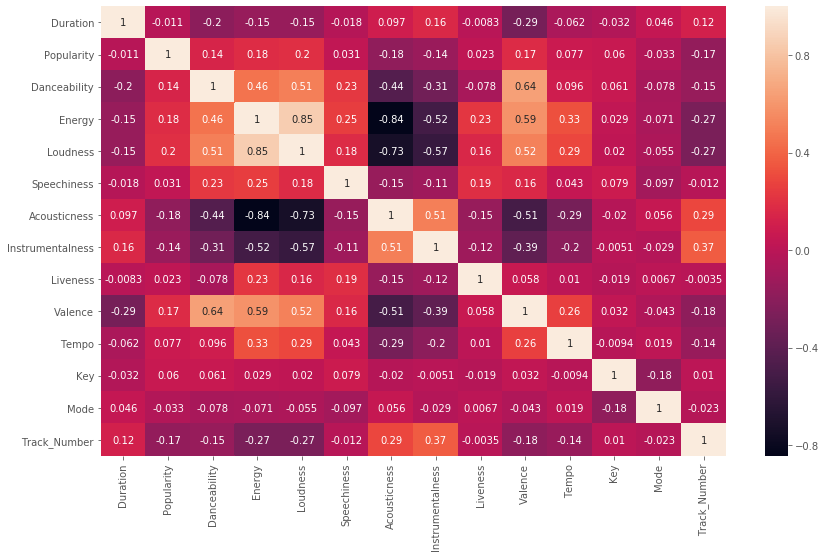

In [66]:
sns.heatmap(songs.corr(), annot=True)

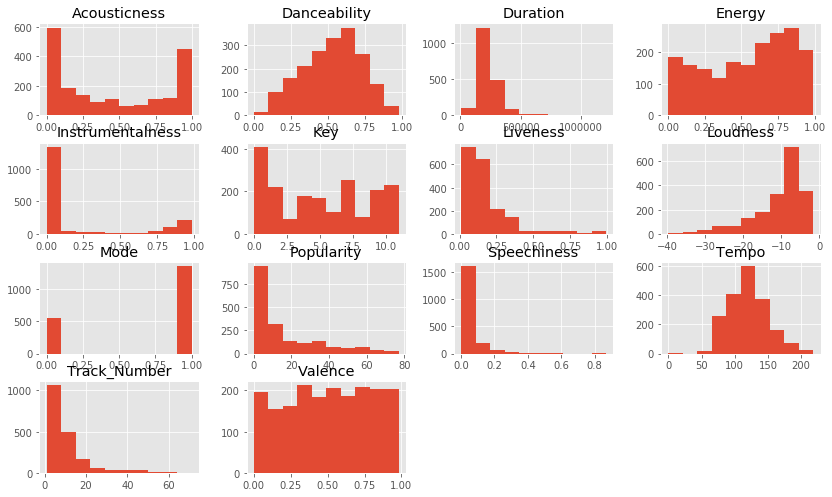

In [67]:
songs.hist()
plt.show()

### Dimension Reduction / PCA

In [68]:
X = songs.iloc[:,7:15].values
y = songs.iloc[:,-3].values

In [69]:
print(X)
print(y)

[[ 7.360e-01  7.150e-01 -4.114e+00 ...  7.960e-04  2.180e-01  8.510e-01]
 [ 6.950e-01  8.790e-01 -5.655e+00 ...  1.970e-01  6.890e-01  9.100e-01]
 [ 6.900e-01  7.220e-01 -5.898e+00 ...  5.290e-04  9.350e-01  6.610e-01]
 ...
 [ 7.240e-01  6.380e-01 -7.222e+00 ...  1.520e-04  1.930e-01  8.550e-01]
 [ 6.050e-01  9.730e-01 -3.996e+00 ...  3.280e-01  1.280e-01  8.110e-02]
 [ 7.360e-01  9.660e-01 -3.567e+00 ...  5.640e-02  9.210e-02  7.510e-02]]
[5 4 0 ... 5 5 7]


In [70]:
X = StandardScaler().fit_transform(X)

In [71]:
pca = PCA(n_components=3)

In [72]:
components = pca.fit_transform(X)

In [73]:
songs_components = pd.DataFrame(data=components,columns=['C1','C2','C3'])

In [74]:
songs_components.head(5)

,C1,C2,C3
0,-2.164132,-0.605689,-0.270924
1,-2.473982,2.335453,1.079732
2,-2.394900,4.273966,1.892828
3,-2.467289,2.118487,-0.250526
4,-1.880478,-0.113057,-0.328107


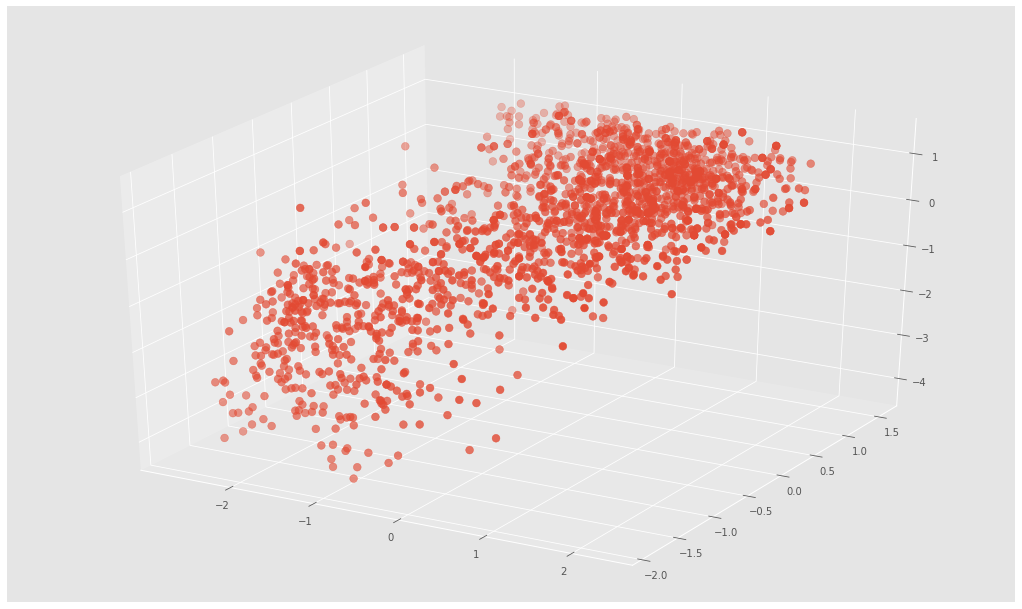

In [75]:

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],s=60)
Axes3D.mouse_init(ax)

In [76]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.42197372  0.70924866  0.58782113 -0.15221732 -0.80406432 -0.423268
  -0.17494101  0.54474716]
 [-1.19133464 -1.39712844 -1.52688371 -0.31011875  1.29018472  1.25286218
  -0.26727403 -1.11926832]
 [ 0.15341619 -0.50482711 -0.01071993 -0.32970192  0.64806536 -0.19586867
  -0.24461229 -0.22255543]
 [ 1.06177152  0.72358956  0.5985686   2.99022391 -0.38323971 -0.31617712
   0.0674656   0.71503285]
 [-0.44434184  0.83246095  0.58519266  0.44332757 -0.58071706 -0.37152743
   3.10264209  0.05792643]]


[0 4 4 ... 0 0 0]
[[ 0.42197372  0.70924866  0.58782113 -0.15221732 -0.80406432 -0.423268
  -0.17494101  0.54474716]
 [-1.19133464 -1.39712844 -1.52688371 -0.31011875  1.29018472  1.25286218
  -0.26727403 -1.11926832]
 [ 0.15341619 -0.50482711 -0.01071993 -0.32970192  0.64806536 -0.19586867
  -0.24461229 -0.22255543]
 [ 1.06177152  0.72358956  0.5985686   2.99022391 -0.38323971 -0.31617712
   0.0674656   0.71503285]
 [-0.44434184  0.83246095  0.58519266  0.44332757 -0.58071706 -0.37152743
   3.10264209  0.05792643]]


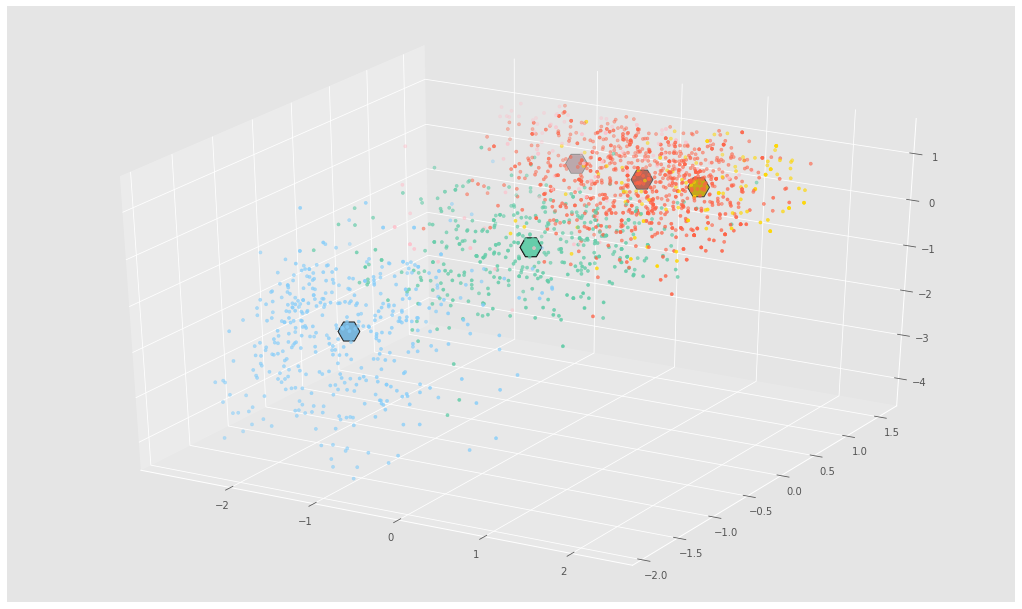

In [77]:
# Predicting the clusters
labels = kmeans.predict(X)
print(labels)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C)
colors=['tomato','lightskyblue','mediumaquamarine','gold','pink'] #'steelblue','mediumpurple'
to_color=[]
for row in labels:
    to_color.append(colors[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=to_color,s=10)
ax.scatter(C[:, 0], C[:, 1],C[:, 2], marker='H', c='black', s=500)
ax.scatter(C[:, 0], C[:, 1],C[:, 2], marker='H', c=colors, s=400)

In [78]:

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([1016, 1528,  813,   23, 1118], dtype=int64)

In [79]:
print(C)

[[ 0.42197372  0.70924866  0.58782113 -0.15221732 -0.80406432 -0.423268
  -0.17494101  0.54474716]
 [-1.19133464 -1.39712844 -1.52688371 -0.31011875  1.29018472  1.25286218
  -0.26727403 -1.11926832]
 [ 0.15341619 -0.50482711 -0.01071993 -0.32970192  0.64806536 -0.19586867
  -0.24461229 -0.22255543]
 [ 1.06177152  0.72358956  0.5985686   2.99022391 -0.38323971 -0.31617712
   0.0674656   0.71503285]
 [-0.44434184  0.83246095  0.58519266  0.44332757 -0.58071706 -0.37152743
   3.10264209  0.05792643]]


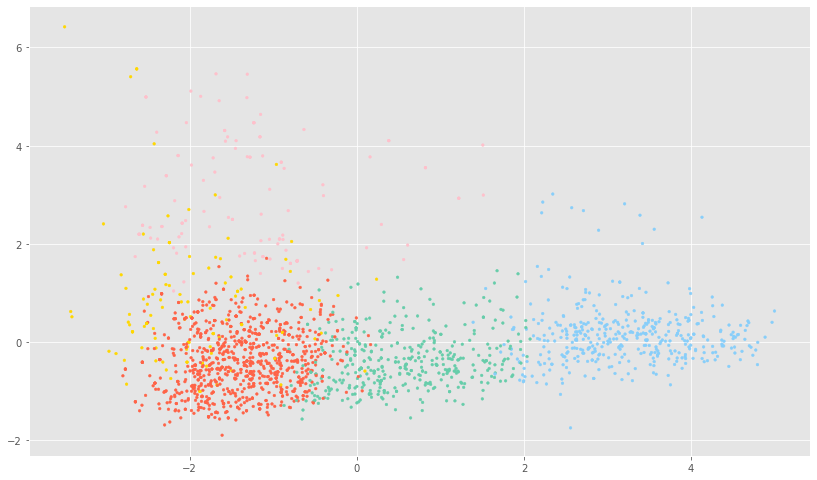

In [80]:
ax1 = songs_components['C1'].values
ax2 = songs_components['C2'].values
 
plt.scatter(ax1, ax2, c=to_color, s=7)
plt.show()

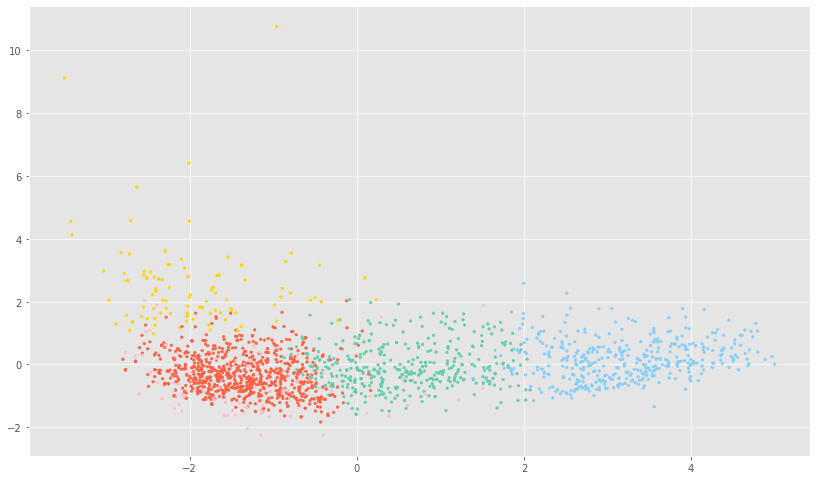

In [81]:
ax1 = songs_components['C1'].values
ax3 = songs_components['C3'].values
 
plt.scatter(ax1, ax3, c=to_color, s=7)
plt.show()

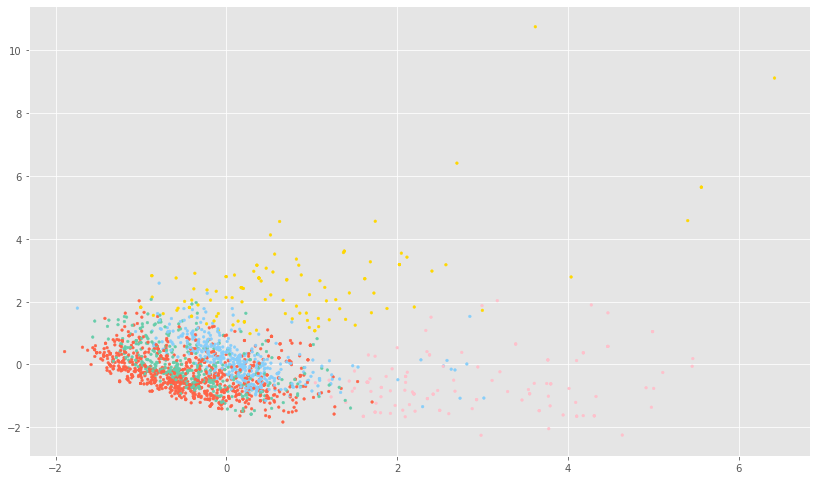

In [82]:
ax2 = songs_components['C2'].values
ax3 = songs_components['C3'].values
 
plt.scatter(ax2, ax3, c=to_color, s=7)
plt.show()

In [83]:
songs_names=songs['Name'].values
for row in closest:
    print(songs_names[row])

Wavin' Flag
Samson et Dalila, Op. 47, R. 288 / Act 3: Bacchanale
Sota L'arbre
Faux Cul (feat. Lamuzgueule)
La flama


In [84]:
# dbscan = DBSCAN(eps=.18,min_samples=10,metric='euclidean',)

In [85]:
# clusters = dbscan.fit_predict(songs_components)

In [86]:
#plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
#plt.xlabel("Feature 0")
#plt.ylabel("Feature 1")

In [87]:
songs_cluster = songs.copy()
songs_cluster['cluster'] = np.nan

In [88]:
cluster_num = []
for row in labels:
    cluster_num.append(row)
                   

In [89]:
len(cluster_num)


1913

In [90]:
songs_cluster['cluster'] = cluster_num

In [91]:
songs_cluster

,Id,Name,Playlist_Id,Album_Id,Date_added,Duration,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Key,Mode,Track_Number,cluster
0,3wD62ofDBqgeJSW2u7WKil,Ragtime Cat (feat. Lilja Bloom),3ypuzkCtKGOQ0Y63x295Jx,5VOdrHq3pi0FTHQZtBaj7V,2018-10-24T14:52:55Z,181000.0,21.0,0.736,0.715,-4.114,0.0412,0.012000,0.000796,0.2180,0.8510,119.976,5,0,1.0,0
1,14EeHJP2ZhOqabZgCAF27r,Artichaut,3ypuzkCtKGOQ0Y63x295Jx,5VOdrHq3pi0FTHQZtBaj7V,2018-10-24T14:52:55Z,265093.0,0.0,0.695,0.879,-5.655,0.1600,0.223000,0.197000,0.6890,0.9100,203.886,4,1,2.0,4
2,4iGiK3PUx1r9G6N3vkQERe,Extra Mile,3ypuzkCtKGOQ0Y63x295Jx,5VOdrHq3pi0FTHQZtBaj7V,2018-10-24T14:52:55Z,305280.0,0.0,0.690,0.722,-5.898,0.2610,0.268000,0.000529,0.9350,0.6610,175.889,0,1,3.0,4
3,2KTHFxwHv1eUUALTx7uBei,AAA (Triple A),3ypuzkCtKGOQ0Y63x295Jx,5VOdrHq3pi0FTHQZtBaj7V,2018-10-24T14:52:55Z,204026.0,15.0,0.671,0.806,-5.632,0.0777,0.056400,0.000003,0.7390,0.8690,129.980,7,1,4.0,4
4,2I13jeL6QfdArAhpqUzFSr,The Sound of Swing (Onur Engin Edit) [feat. Al...,3ypuzkCtKGOQ0Y63x295Jx,5VOdrHq3pi0FTHQZtBaj7V,2018-10-24T14:52:55Z,341493.0,13.0,0.544,0.815,-4.554,0.0772,0.008510,0.000017,0.1690,0.7440,90.015,7,1,5.0,0
5,2sm8jAsyuyoX45ytlnyBLj,No Diggity (Minimatic Remix),3ypuzkCtKGOQ0Y63x295Jx,5VOdrHq3pi0FTHQZtBaj7V,2018-10-24T14:52:55Z,212320.0,19.0,0.855,0.698,-6.697,0.0600,0.056300,0.063800,0.0750,0.6810,116.043,11,0,6.0,0
6,0x9zhyDsfltieIXYUv1XRg,Gangsterlove (Soundnomaden Remix),3ypuzkCtKGOQ0Y63x295Jx,5VOdrHq3pi0FTHQZtBaj7V,2018-10-24T14:52:55Z,253733.0,0.0,0.798,0.794,-5.287,0.0711,0.257000,0.000000,0.0872,0.7720,123.987,5,0,7.0,0
7,6cM9Wxrwik0TipzJPcZLG7,Swing You Winners (feat. Tape Five),3ypuzkCtKGOQ0Y63x295Jx,5VOdrHq3pi0FTHQZtBaj7V,2018-10-24T14:52:55Z,164080.0,12.0,0.669,0.771,-5.286,0.1910,0.008970,0.000061,0.2750,0.5920,169.916,7,1,8.0,3
8,4mpyBYJzpieMYwvtnnlzlY,Shadrack (Fonograff Rework),3ypuzkCtKGOQ0Y63x295Jx,5VOdrHq3pi0FTHQZtBaj7V,2018-10-24T14:52:55Z,228693.0,20.0,0.880,0.870,-5.851,0.3200,0.279000,0.000806,0.1160,0.7430,115.056,5,0,9.0,3
9,1Z0UlpDHhTmRRF2p5aZPa7,Vive le swing (Gabin Brassy Remix),3ypuzkCtKGOQ0Y63x295Jx,5VOdrHq3pi0FTHQZtBaj7V,2018-10-24T14:52:55Z,266133.0,0.0,0.786,0.831,-5.620,0.1200,0.072400,0.000000,0.8530,0.7990,117.964,10,0,10.0,4


In [92]:
num_of_clusters = songs_cluster['cluster'].value_counts()
num_of_clusters.count()

5

In [93]:
list_val= []
for x in range(num_of_clusters.count()):
    list_val.append('df_'+str(x))
    songs_cluster['cluster'].count()
    mask = songs_cluster['cluster'] == x
    list_val[x] = songs_cluster[mask]
    temp = pd.DataFrame(list_val[x])
    temp.to_csv(username + '_cluster5_' + str(x) + '.csv')

In [94]:
pd.read_csv(username + '_cluster5_0.csv').sort_values(['Popularity'], ascending=False).head(10)

,Unnamed: 0,Id,Name,Playlist_Id,Album_Id,Date_added,Duration,Popularity,Danceability,Energy,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Key,Mode,Track_Number,cluster
413,878,6IwKcFdiRQZOWeYNhUiWIv,No One,0Kz18Qq6boSucTkU8R2aaF,6KlxyxhXEDo1LdheFulN7h,1970-01-01T00:00:00Z,253813.0,77.0,0.644,0.548,...,0.0286,0.020900,0.000009,0.134,0.166,90.042,1,0,4.0,0
394,850,6L89mwZXSOwYl76YXfX13s,Basket Case,0Kz18Qq6boSucTkU8R2aaF,4uG8q3GPuWHQlRbswMIRS6,1970-01-01T00:00:00Z,181533.0,76.0,0.442,0.943,...,0.0602,0.002930,0.000009,0.091,0.781,85.064,3,1,7.0,0
513,1014,1mea3bSkSGXuIRvnydlB5b,Viva La Vida,0Kz18Qq6boSucTkU8R2aaF,1CEODgTmTwLyabvwd7HBty,2010-06-24T11:55:20Z,242373.0,76.0,0.485,0.619,...,0.0289,0.094100,0.000003,0.109,0.416,138.017,5,0,7.0,0
287,570,6RtPijgfPKROxEzTHNRiDp,Rude,41qf7DQAsri9nLj6pVWpOt,0RZ4Ct4vegYBmL9g88TBNi,2015-01-03T11:32:51Z,224840.0,75.0,0.774,0.756,...,0.0389,0.042300,0.000000,0.305,0.931,144.032,1,1,1.0,0
279,562,6RtPijgfPKROxEzTHNRiDp,Rude,NaN,0RZ4Ct4vegYBmL9g88TBNi,2015-01-02T09:55:38Z,224840.0,75.0,0.774,0.756,...,0.0389,0.042300,0.000000,0.305,0.931,144.032,1,1,1.0,0
183,308,6RtPijgfPKROxEzTHNRiDp,Rude,7nW9BlocQCzpeLwufiJ4RJ,0RZ4Ct4vegYBmL9g88TBNi,2016-12-02T18:24:01Z,224840.0,75.0,0.774,0.756,...,0.0389,0.042300,0.000000,0.305,0.931,144.032,1,1,1.0,0
138,249,6RtPijgfPKROxEzTHNRiDp,Rude,5mLQ2pzeGmEwuc7NFrsmp6,0RZ4Ct4vegYBmL9g88TBNi,2016-11-01T18:08:33Z,224840.0,75.0,0.774,0.756,...,0.0389,0.042300,0.000000,0.305,0.931,144.032,1,1,1.0,0
614,1197,225xvV8r1yKMHErSWivnow,"I Don't Want to Miss a Thing - From ""Armageddo...",0Kz18Qq6boSucTkU8R2aaF,4f7HKjBnjpMsDBDTHYV890,2011-07-25T14:51:11Z,298760.0,74.0,0.383,0.662,...,0.0333,0.165000,0.000000,0.248,0.138,121.154,2,1,1.0,0
542,1057,1vxw6aYJls2oq3gW0DujAo,Crazy,0Kz18Qq6boSucTkU8R2aaF,5I0Wf7lRLZArM1K2uQ1AEA,2011-05-17T13:55:22Z,177466.0,73.0,0.855,0.587,...,0.0336,0.050500,0.007140,0.105,0.640,111.970,8,1,2.0,0
802,1821,4VqPOruhp5EdPBeR92t6lQ,Uprising,5LR210vwhwJxrJWBGxTzMh,0eFHYz8NmK75zSplL5qlfM,2011-11-21T11:58:09Z,304840.0,73.0,0.602,0.905,...,0.0775,0.000202,0.064000,0.117,0.411,128.019,2,1,1.0,0


In [95]:
pd.read_csv(username + '_cluster5_1.csv').sort_values(['Popularity'], ascending=False).head(10)

,Unnamed: 0,Id,Name,Playlist_Id,Album_Id,Date_added,Duration,Popularity,Danceability,Energy,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Key,Mode,Track_Number,cluster
151,1211,11X4Gw3T4hoktVruLgTnm1,Heartbeats,0Kz18Qq6boSucTkU8R2aaF,7M6XGBvDi3smtRuPUkrqsG,2011-09-27T10:36:33Z,160240.0,62.0,0.552,0.1500,...,0.0347,0.974,0.731,0.0698,0.3160,87.485,3,1,4.0,1
416,1873,21cp8L9Pei4AgysZVihjSv,Child in Time,5LR210vwhwJxrJWBGxTzMh,2jm9Vixt3Nn2oE4VtOVUD8,2011-11-21T11:58:09Z,619266.0,52.0,0.331,0.3400,...,0.0369,0.313,0.607,0.2340,0.3650,126.672,9,0,5.0,1
117,668,1zz2CSclaxD3ql7M9Y8YI3,"Nabucco, Act III: Chorus of the Hebrew Slaves,...",0EwEbOTcoueyXQl1Et4Or6,0bgjJ99UFbk0yBOzjJl7cq,2013-05-13T11:45:27Z,299253.0,35.0,0.224,0.0945,...,0.0426,0.989,0.764,0.1020,0.0574,124.206,1,1,12.0,1
110,660,0Lk6BudgphwpUmPpiLrEvg,"Adagio for Strings, Op. 11",0EwEbOTcoueyXQl1Et4Or6,0bgjJ99UFbk0yBOzjJl7cq,2013-05-13T11:45:27Z,502613.0,34.0,0.101,0.1990,...,0.0437,0.933,0.874,0.0974,0.0317,75.662,10,0,4.0,1
126,679,5nsYZFNyMefd50yamWgMfy,"Pomp and Circumstance, Op. 39: No. 1, March in...",0EwEbOTcoueyXQl1Et4Or6,0bgjJ99UFbk0yBOzjJl7cq,2013-05-13T11:45:27Z,345666.0,34.0,0.274,0.4340,...,0.0433,0.689,0.760,0.0705,0.3150,131.962,2,1,23.0,1
107,657,38s4sbLZood2eUTelSO3ow,"Peer Gynt Suite No. 1, Op. 46: I. Morning Mood",0EwEbOTcoueyXQl1Et4Or6,0bgjJ99UFbk0yBOzjJl7cq,2013-05-13T11:45:27Z,224680.0,34.0,0.178,0.1130,...,0.0396,0.977,0.881,0.1090,0.0348,132.031,4,1,1.0,1
109,659,2SUVP01rFiE6jwonGoSBN9,"The Four Seasons, Violin Concerto in E Major, ...",0EwEbOTcoueyXQl1Et4Or6,0bgjJ99UFbk0yBOzjJl7cq,2013-05-13T11:45:27Z,192746.0,33.0,0.489,0.1730,...,0.0449,0.745,0.747,0.1160,0.2170,108.548,4,1,3.0,1
113,663,3NvddSkpVLOFxKUPoTQm53,"Canon and Gigue in D Major, P. 37: I. Canon",0EwEbOTcoueyXQl1Et4Or6,0bgjJ99UFbk0yBOzjJl7cq,2013-05-13T11:45:27Z,210106.0,33.0,0.391,0.3400,...,0.0412,0.949,0.827,0.1100,0.5010,136.602,2,1,7.0,1
116,667,3yqrsX1aDD5ZS0t4f5msxA,"Suite bergamasque, L. 75: III. Clair de lune",0EwEbOTcoueyXQl1Et4Or6,0bgjJ99UFbk0yBOzjJl7cq,2013-05-13T11:45:27Z,313906.0,33.0,0.388,0.0292,...,0.0459,0.994,0.912,0.1040,0.0400,68.797,1,1,11.0,1
123,676,4zEGECYEuEPAq52wHswpPB,3 Gymnopédies: I. Lent et douloureux,0EwEbOTcoueyXQl1Et4Or6,0bgjJ99UFbk0yBOzjJl7cq,2013-05-13T11:45:27Z,220733.0,33.0,0.456,0.0108,...,0.0755,0.995,0.961,0.1010,0.3150,69.457,7,1,20.0,1


In [96]:
pd.read_csv(username + '_cluster5_2.csv').sort_values(['Popularity'], ascending=False).head(10)

,Unnamed: 0,Id,Name,Playlist_Id,Album_Id,Date_added,Duration,Popularity,Danceability,Energy,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Key,Mode,Track_Number,cluster
284,1266,7DFNE7NO0raLIUbgzY2rzm,Let Her Go,0Kz18Qq6boSucTkU8R2aaF,2mylGx7w2Q3yhUyN8iEWOF,2013-10-02T07:58:17Z,252866.0,73.0,0.509,0.538,...,0.0572,0.3850,0.000000,0.1040,0.2440,75.089,7,1,2.0,2
245,1065,1JO1xLtVc8mWhIoE3YaCL0,Happy Together,0Kz18Qq6boSucTkU8R2aaF,2pMxs38Y5A0mmHrcu3twvB,2011-05-17T13:57:14Z,176293.0,72.0,0.584,0.367,...,0.0328,0.5500,0.000014,0.0818,0.5880,120.175,6,0,6.0,2
111,573,0W4Kpfp1w2xkY3PrV714B7,Ho Hey,41qf7DQAsri9nLj6pVWpOt,6NWYmlHxAME5KXtxrTlUxW,2015-01-03T12:20:20Z,163133.0,67.0,0.685,0.466,...,0.0304,0.7940,0.000002,0.0915,0.3530,79.936,0,1,5.0,2
213,903,03yc0G2OoH1Eeyu7Piy8fK,I'm Yours,0Kz18Qq6boSucTkU8R2aaF,0hmfkAEc0WQcv1dplyLYte,1970-01-01T00:00:00Z,243494.0,62.0,0.689,0.432,...,0.0452,0.5640,0.000000,0.0928,0.7470,151.079,11,1,1.0,2
60,445,5OkKOkdVTKFrYi6GWXkMzR,Volare (Nel Blu Di Pinto Di Blu) - Remastered,7bsAR19p7zO45OpIpiCqQB,7dfnxOYh1XR9AKqCcGckGX,2015-09-29T10:02:54Z,181626.0,61.0,0.612,0.144,...,0.0352,0.8800,0.000000,0.2030,0.3430,128.629,6,0,1.0,2
241,1059,24AIahNHzBxm9S12peXbnG,"Moon River (From ""Breakfast at Tiffany's"")",0Kz18Qq6boSucTkU8R2aaF,1RLfn8e4cQvC0WsYJM6rh2,2011-05-17T13:57:14Z,162893.0,60.0,0.281,0.212,...,0.0310,0.8600,0.000077,0.1190,0.1950,95.555,6,1,7.0,2
229,988,2EIaO5knwUA3F2qnf9LV3S,Beyond the Sea,0Kz18Qq6boSucTkU8R2aaF,65okcRJHUVUrFiDG3I1Sz8,2010-05-18T10:06:09Z,172480.0,60.0,0.521,0.516,...,0.0369,0.7230,0.000000,0.2570,0.5690,136.483,2,0,17.0,2
399,1817,7uv632EkfwYhXoqf8rhYrg,Angel,5LR210vwhwJxrJWBGxTzMh,49MNmJhZQewjt06rpwp6QR,2011-11-21T11:58:09Z,379533.0,59.0,0.714,0.309,...,0.0291,0.0157,0.807000,0.0777,0.0671,107.346,7,1,1.0,2
69,460,4fHDlIntTsRGSyTg5UYZYC,Banana Boat (Day-O),7bsAR19p7zO45OpIpiCqQB,5cBYisZzEb84qxMwXVfcT3,2015-09-29T11:20:19Z,183133.0,59.0,0.797,0.105,...,0.0969,0.8850,0.000116,0.1080,0.4190,122.545,1,1,1.0,2
289,1288,0yKK9to5WLMT35x8dRU1W5,Hero,0Kz18Qq6boSucTkU8R2aaF,3VThTmMrzPDzNFSnzAUxqC,2016-12-06T14:40:09Z,190280.0,58.0,0.344,0.532,...,0.0275,0.1980,0.000019,0.1150,0.2560,174.760,5,1,5.0,2


In [97]:
pd.read_csv(username + '_cluster5_3.csv').sort_values(['Popularity'], ascending=False).head(10)

,Unnamed: 0,Id,Name,Playlist_Id,Album_Id,Date_added,Duration,Popularity,Danceability,Energy,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Key,Mode,Track_Number,cluster
78,971,7Lf7oSEVdzZqTA0kEDSlS5,Cry Me a River,0Kz18Qq6boSucTkU8R2aaF,6QPkyl04rXwTGlGlcYaRoW,2010-05-18T09:53:23Z,288333.0,72.0,0.624,0.653,...,0.176,0.57500,0.000000,0.104,0.565,73.884,8,0,5.0,3
85,1096,3LXFi1Xk9qJsYXYEjDcuVH,19 Dias y 500 Noches - En Directo,0Kz18Qq6boSucTkU8R2aaF,6lzBpfskJ6azfSi88CECKv,2011-05-17T14:02:09Z,319053.0,59.0,0.572,0.899,...,0.580,0.52000,0.000000,0.692,0.552,86.472,4,1,9.0,3
105,1409,3LXFi1Xk9qJsYXYEjDcuVH,19 Dias y 500 Noches - En Directo,5aMcG4sVMmkV1u3YC63hMQ,6lzBpfskJ6azfSi88CECKv,2010-08-05T10:22:42Z,319053.0,59.0,0.572,0.899,...,0.580,0.52000,0.000000,0.692,0.552,86.472,4,1,9.0,3
42,495,3PnOOmkxruDDAiMYZZTgO7,Goodbye (feat. Lyse) - Radio Edit,64JY1fITMumLMHvbjyhYHS,2UGPPuVJHDKLYd9Z2G7zS4,2016-06-16T08:58:33Z,201938.0,57.0,0.832,0.876,...,0.205,0.17300,0.737000,0.162,0.635,120.057,6,0,1.0,3
28,292,3PnOOmkxruDDAiMYZZTgO7,Goodbye (feat. Lyse) - Radio Edit,7nW9BlocQCzpeLwufiJ4RJ,2UGPPuVJHDKLYd9Z2G7zS4,2016-12-02T18:24:01Z,201938.0,57.0,0.832,0.876,...,0.205,0.17300,0.737000,0.162,0.635,120.057,6,0,1.0,3
21,239,3PnOOmkxruDDAiMYZZTgO7,Goodbye (feat. Lyse) - Radio Edit,5mLQ2pzeGmEwuc7NFrsmp6,2UGPPuVJHDKLYd9Z2G7zS4,2016-11-01T18:03:51Z,201938.0,57.0,0.832,0.876,...,0.205,0.17300,0.737000,0.162,0.635,120.057,6,0,1.0,3
107,1434,6htAV9HKCmoDdyyvDNX9DQ,La Lista De La Compra,5aMcG4sVMmkV1u3YC63hMQ,3ASW0wki9GC0PB5CTyOaLA,2011-05-27T15:09:04Z,221373.0,49.0,0.629,0.899,...,0.246,0.29200,0.000000,0.278,0.290,109.282,7,0,2.0,3
64,645,0OuWBW2Q299zvZCdLUPlLx,Jolie Coquine,5Z8VUi5qQUVkO1HzuZXUq9,0AQU2cTRwdbTHkkJLmZZpG,2013-11-20T11:36:51Z,225697.0,49.0,0.742,0.935,...,0.373,0.00734,0.000002,0.125,0.588,125.034,4,0,4.0,3
108,1439,1pX5XE5hajZQ4lB6HuMVKa,Felicidad,5aMcG4sVMmkV1u3YC63hMQ,1zIyzZFhqB27mVPqnwJpTs,2011-07-08T13:37:37Z,254653.0,48.0,0.669,0.914,...,0.184,0.13600,0.000000,0.169,0.919,102.002,7,1,1.0,3
17,203,1pX5XE5hajZQ4lB6HuMVKa,Felicidad,5mLQ2pzeGmEwuc7NFrsmp6,1zIyzZFhqB27mVPqnwJpTs,2016-10-20T15:33:57Z,254653.0,48.0,0.669,0.914,...,0.184,0.13600,0.000000,0.169,0.919,102.002,7,1,1.0,3


In [98]:
pd.read_csv(username + '_cluster5_4.csv').sort_values(['Popularity'], ascending=False).head(10)

,Unnamed: 0,Id,Name,Playlist_Id,Album_Id,Date_added,Duration,Popularity,Danceability,Energy,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Key,Mode,Track_Number,cluster
56,1157,3APayTEWiUl9Ssep4BOXR2,Torn,0Kz18Qq6boSucTkU8R2aaF,5snQakFpbHsJmrAvhgeuHX,2011-05-17T14:17:29Z,244813.0,66.0,0.559,0.928,...,0.0355,0.0746,0.000056,0.696,0.599,96.315,5,1,3.0,4
5,218,6Yu1OL8I0D4vjOzYdsXYGK,12:51,5mLQ2pzeGmEwuc7NFrsmp6,3HFbH1loOUbqCyPsLuHLLh,2016-11-01T17:28:06Z,153133.0,56.0,0.452,0.889,...,0.0379,0.3120,0.800000,0.558,0.591,145.056,4,1,4.0,4
66,1273,6Yu1OL8I0D4vjOzYdsXYGK,12:51,0Kz18Qq6boSucTkU8R2aaF,3HFbH1loOUbqCyPsLuHLLh,2014-12-17T11:56:40Z,153133.0,56.0,0.452,0.889,...,0.0379,0.3120,0.800000,0.558,0.591,145.056,4,1,4.0,4
12,340,6Yu1OL8I0D4vjOzYdsXYGK,12:51,7nW9BlocQCzpeLwufiJ4RJ,3HFbH1loOUbqCyPsLuHLLh,2016-12-02T18:24:01Z,153133.0,56.0,0.452,0.889,...,0.0379,0.3120,0.800000,0.558,0.591,145.056,4,1,4.0,4
29,898,0zge3Oe6qU1jnvSgxDRQYU,The Joker,0Kz18Qq6boSucTkU8R2aaF,7kASxXIWWMoaHHS637Vome,1970-01-01T00:00:00Z,213480.0,51.0,0.415,0.551,...,0.0821,0.4270,0.000002,0.572,0.740,166.736,10,1,11.0,4
37,994,0n0eMsX7WgEtc7dlscbuKU,Fly Away,0Kz18Qq6boSucTkU8R2aaF,1cW0de5T5fdedlS4YqvyCv,2010-05-18T10:11:45Z,221893.0,51.0,0.597,0.868,...,0.0527,0.0214,0.000000,0.664,0.709,160.022,7,1,2.0,4
34,961,5rDsAMjmB4Qa5WNciJPsfK,Tubthumping,0Kz18Qq6boSucTkU8R2aaF,6DUy5QdkKXI15NFbk3pYAZ,2010-05-18T09:44:06Z,234133.0,50.0,0.394,0.944,...,0.1810,0.0906,0.000000,0.473,0.616,207.687,2,1,19.0,4
45,1078,5HmYuJIqLEXOa9i4YQJWoQ,Cantares - En Directo,0Kz18Qq6boSucTkU8R2aaF,5uc1F7ZXMeGxgvfp9z7W8G,2011-05-17T14:02:09Z,196200.0,49.0,0.545,0.681,...,0.1520,0.6990,0.000000,0.985,0.502,121.855,7,1,2.0,4
79,1391,5HmYuJIqLEXOa9i4YQJWoQ,Cantares - En Directo,5aMcG4sVMmkV1u3YC63hMQ,5uc1F7ZXMeGxgvfp9z7W8G,2010-08-05T10:13:26Z,196200.0,49.0,0.545,0.681,...,0.1520,0.6990,0.000000,0.985,0.502,121.855,7,1,2.0,4
51,1118,4jJGiNGzoUV4uacldNW5Qb,La flama,0Kz18Qq6boSucTkU8R2aaF,2r4JhlakaroVwEGcLKU0Eu,2011-05-17T14:03:01Z,212520.0,43.0,0.487,0.813,...,0.0349,0.0161,0.000002,0.727,0.453,93.609,7,1,4.0,4
